# <center> Linear Regression with Python Scikit Learn

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

## EDA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## Correlation 

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

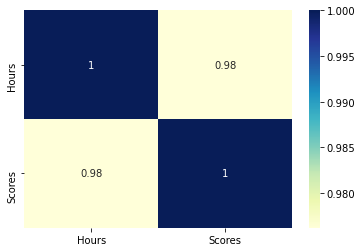

In [8]:
sns.heatmap(df.corr(), annot=True ,cmap="YlGnBu" )

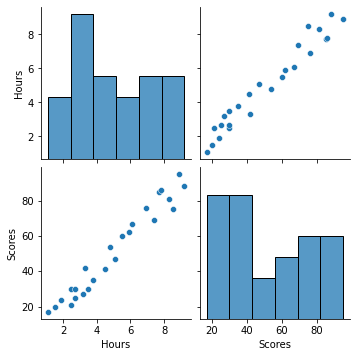

In [9]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation using GGPLOT')

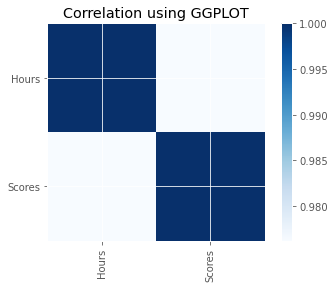

In [10]:
plt.style.use('ggplot')
plt.imshow(df.corr(), cmap= plt.cm.Blues, interpolation= 'nearest')
plt.colorbar()
tick_marks= [i for i in range (len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation= 'vertical')
plt.yticks(tick_marks, df.columns)
plt.title('Correlation using GGPLOT')

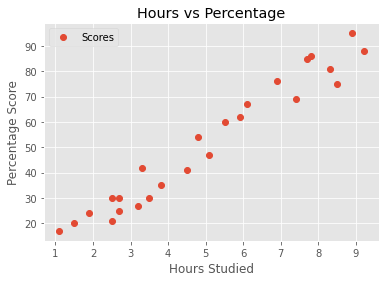

In [11]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Builing Machine Learning Model

In [12]:
X= df.loc[:, 'Hours'].values
y= df.loc[:, 'Scores'].values

In [13]:
X= np.array(X).reshape(-1,1)
y= np.array(y).reshape(-1, 1)

In [14]:
X.shape, y.shape

((25, 1), (25, 1))

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1711)

In [17]:
X_train.shape

(18, 1)

In [18]:
lm= LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
coef= pd.DataFrame({'Intercept': lm.intercept_,
                  'Slope': lm.coef_.flatten()})
coef

,Intercept,Slope
0,1.320506,9.93344


In [21]:
print('The value of the Intercept is: ', lm.intercept_)
print('The value of the Slope is: ',lm.coef_)

The value of the Intercept is:  [1.32050595]
The value of the Slope is:  [[9.93344044]]


In [22]:
y_pred= lm.predict(X_test)

In [23]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.664404297408659
Mean Squared Error: 14.984129921058335
Root Mean Squared Error: 3.8709339856239264
